In [1]:
! pip install ultralytics

Number Plate Detection

In [2]:
import torch
torch.__version__

'2.3.0+cu121'

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uY76QjOrOtp4DQwqvrK8")
project = rf.workspace("samrat-sahoo").project("license-plates-f8vsn")
version = project.version(5)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.31, to fix: `pip install ultralytics==8.0.196`


In [4]:
import ultralytics
from ultralytics import YOLO
model=YOLO()

In [5]:
!yolo task=detect mode=train model=yolov8s.pt data=data2.yaml epochs=25 imgsz=224 plots=True

100% 21.5M/21.5M [00:00<00:00, 242MB/s]
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data2.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

Validation

In [6]:
! yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=data2.yaml

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/License-Plates-5/valid/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100% 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:05<00:00,  1.12s/it]
                   all         70        218      0.829      0.774      0.824      0.629
         license-plate         70         84       0.87      0.793      0.857      0.622
               vehicle         68        134      0.788      0.754      0.791      0.636
Speed: 1.7ms preprocess, 26.8ms inference, 0.0ms loss, 20.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [13]:
! yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/a.mp4

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/631) /content/a.mp4: 160x224 1 license-plate, 2 vehicles, 101.9ms
video 1/1 (frame 2/631) /content/a.mp4: 160x224 1 license-plate, 2 vehicles, 8.1ms
video 1/1 (frame 3/631) /content/a.mp4: 160x224 1 license-plate, 2 vehicles, 8.2ms
video 1/1 (frame 4/631) /content/a.mp4: 160x224 1 license-plate, 2 vehicles, 7.8ms
video 1/1 (frame 5/631) /content/a.mp4: 160x224 1 license-plate, 2 vehicles, 7.9ms
video 1/1 (frame 6/631) /content/a.mp4: 160x224 1 license-plate, 2 vehicles, 7.9ms
video 1/1 (frame 7/631) /content/a.mp4: 160x224 1 license-plate, 2 vehicles, 8.0ms
video 1/1 (frame 8/631) /content/a.mp4: 160x224 1 license-plate, 2 vehicles, 7.8ms
video 1/1 (frame 9/631) /content/a.mp4: 160x224 1 license-plate, 2 vehicles, 8.2ms
video 1/1 (frame 10/631) /content/a.mp4: 160x224 1 license-plate, 2 vehicles, 8.1m

In [ ]:
# ! yolo task=detect mode=predict model=runs\detect\train2\weights\best.pt source=

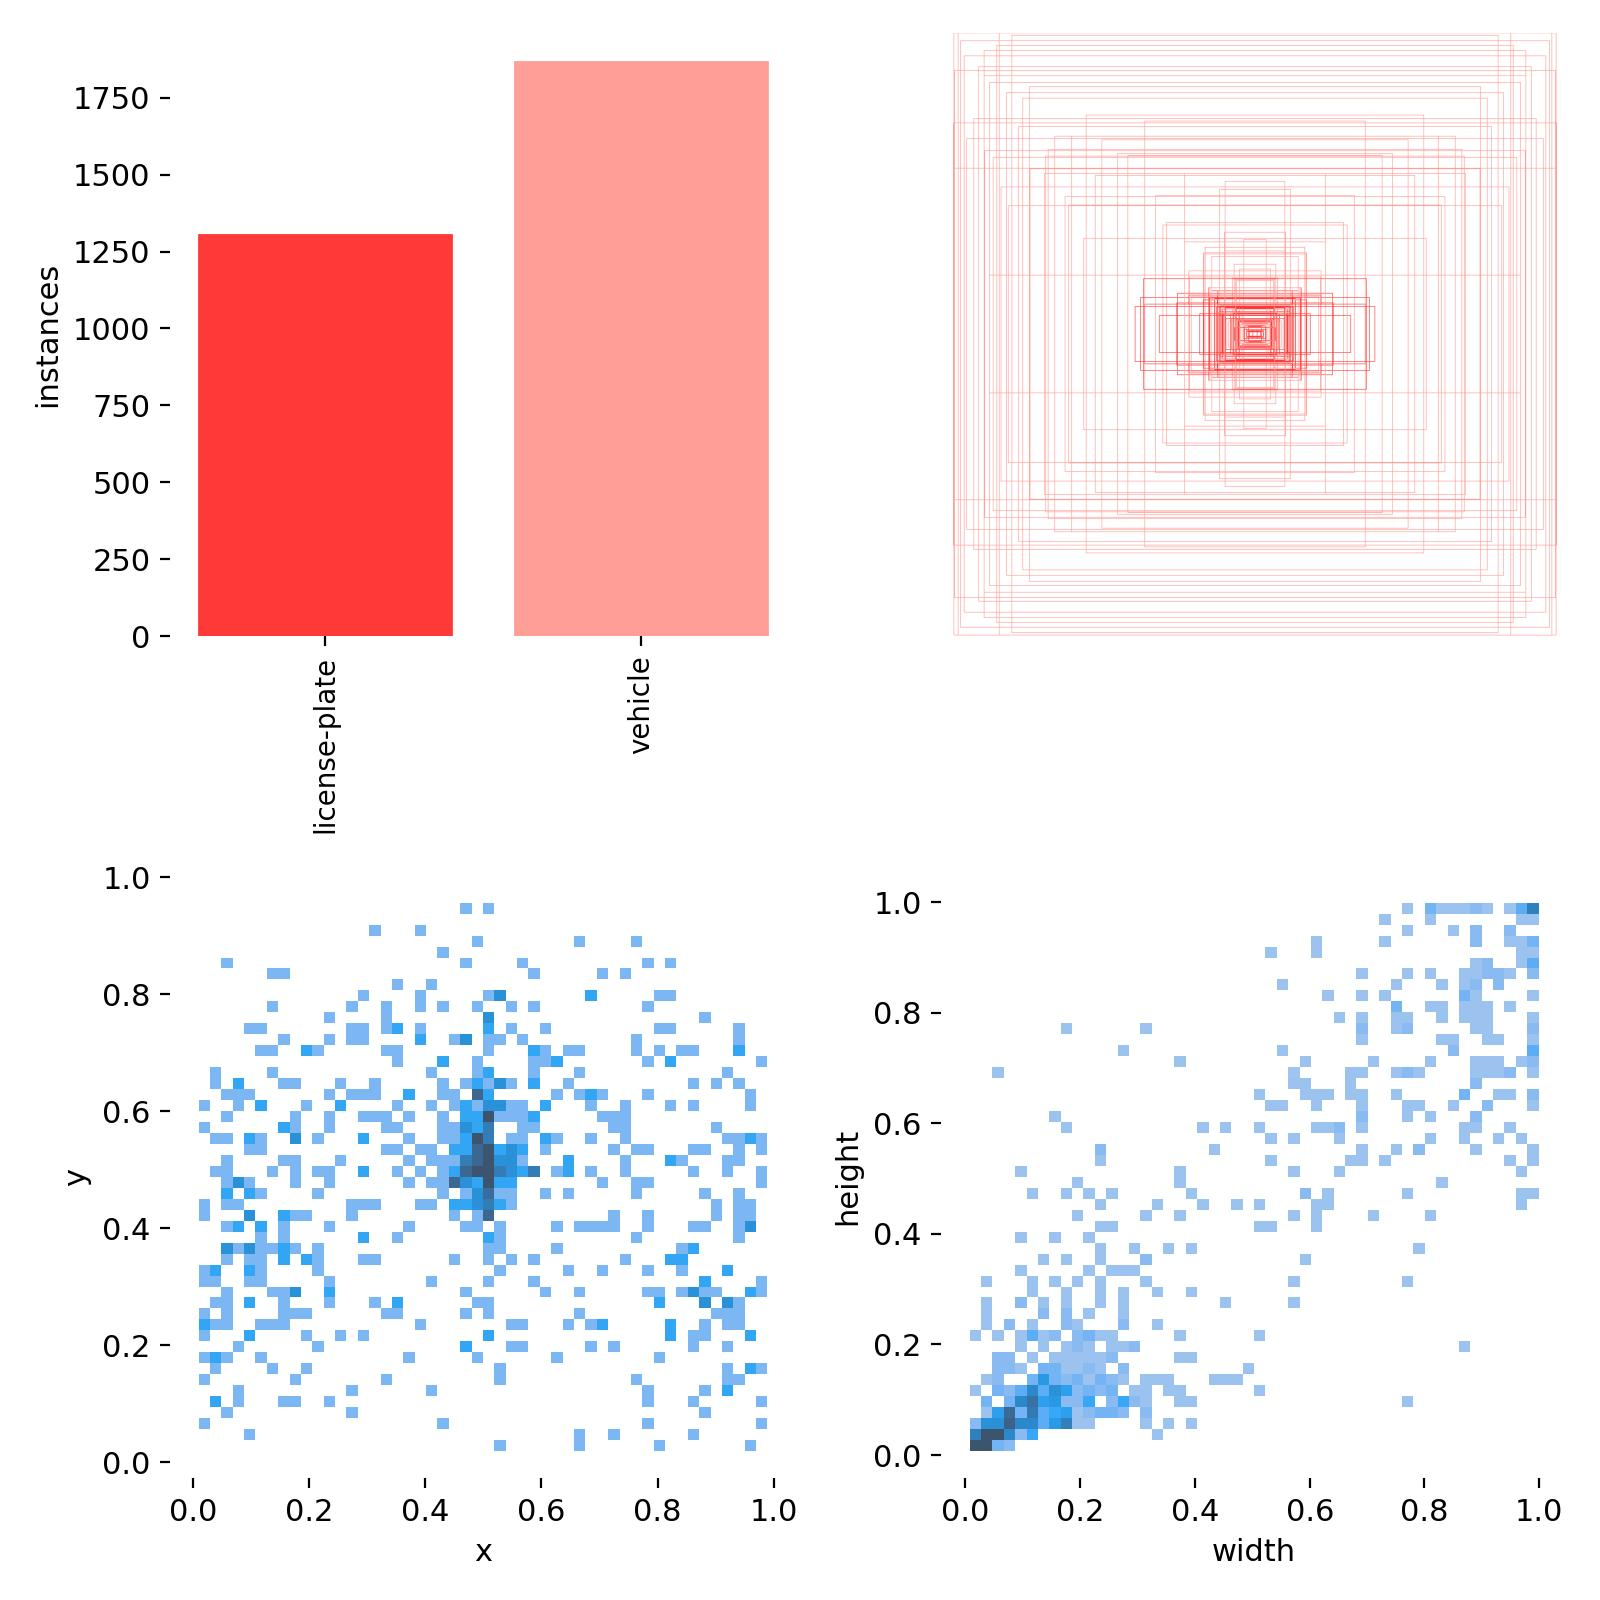

In [9]:
from IPython.display import Image
Image("/content/runs/detect/train/labels.jpg")


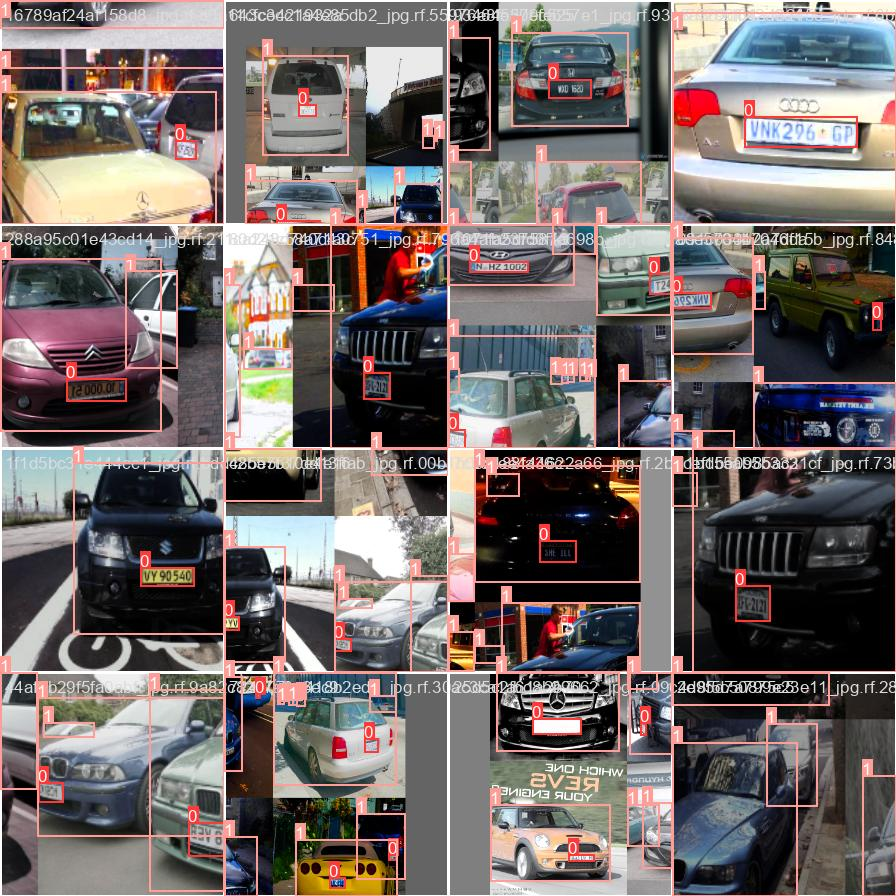

In [10]:
Image("/content/runs/detect/train/train_batch2.jpg")

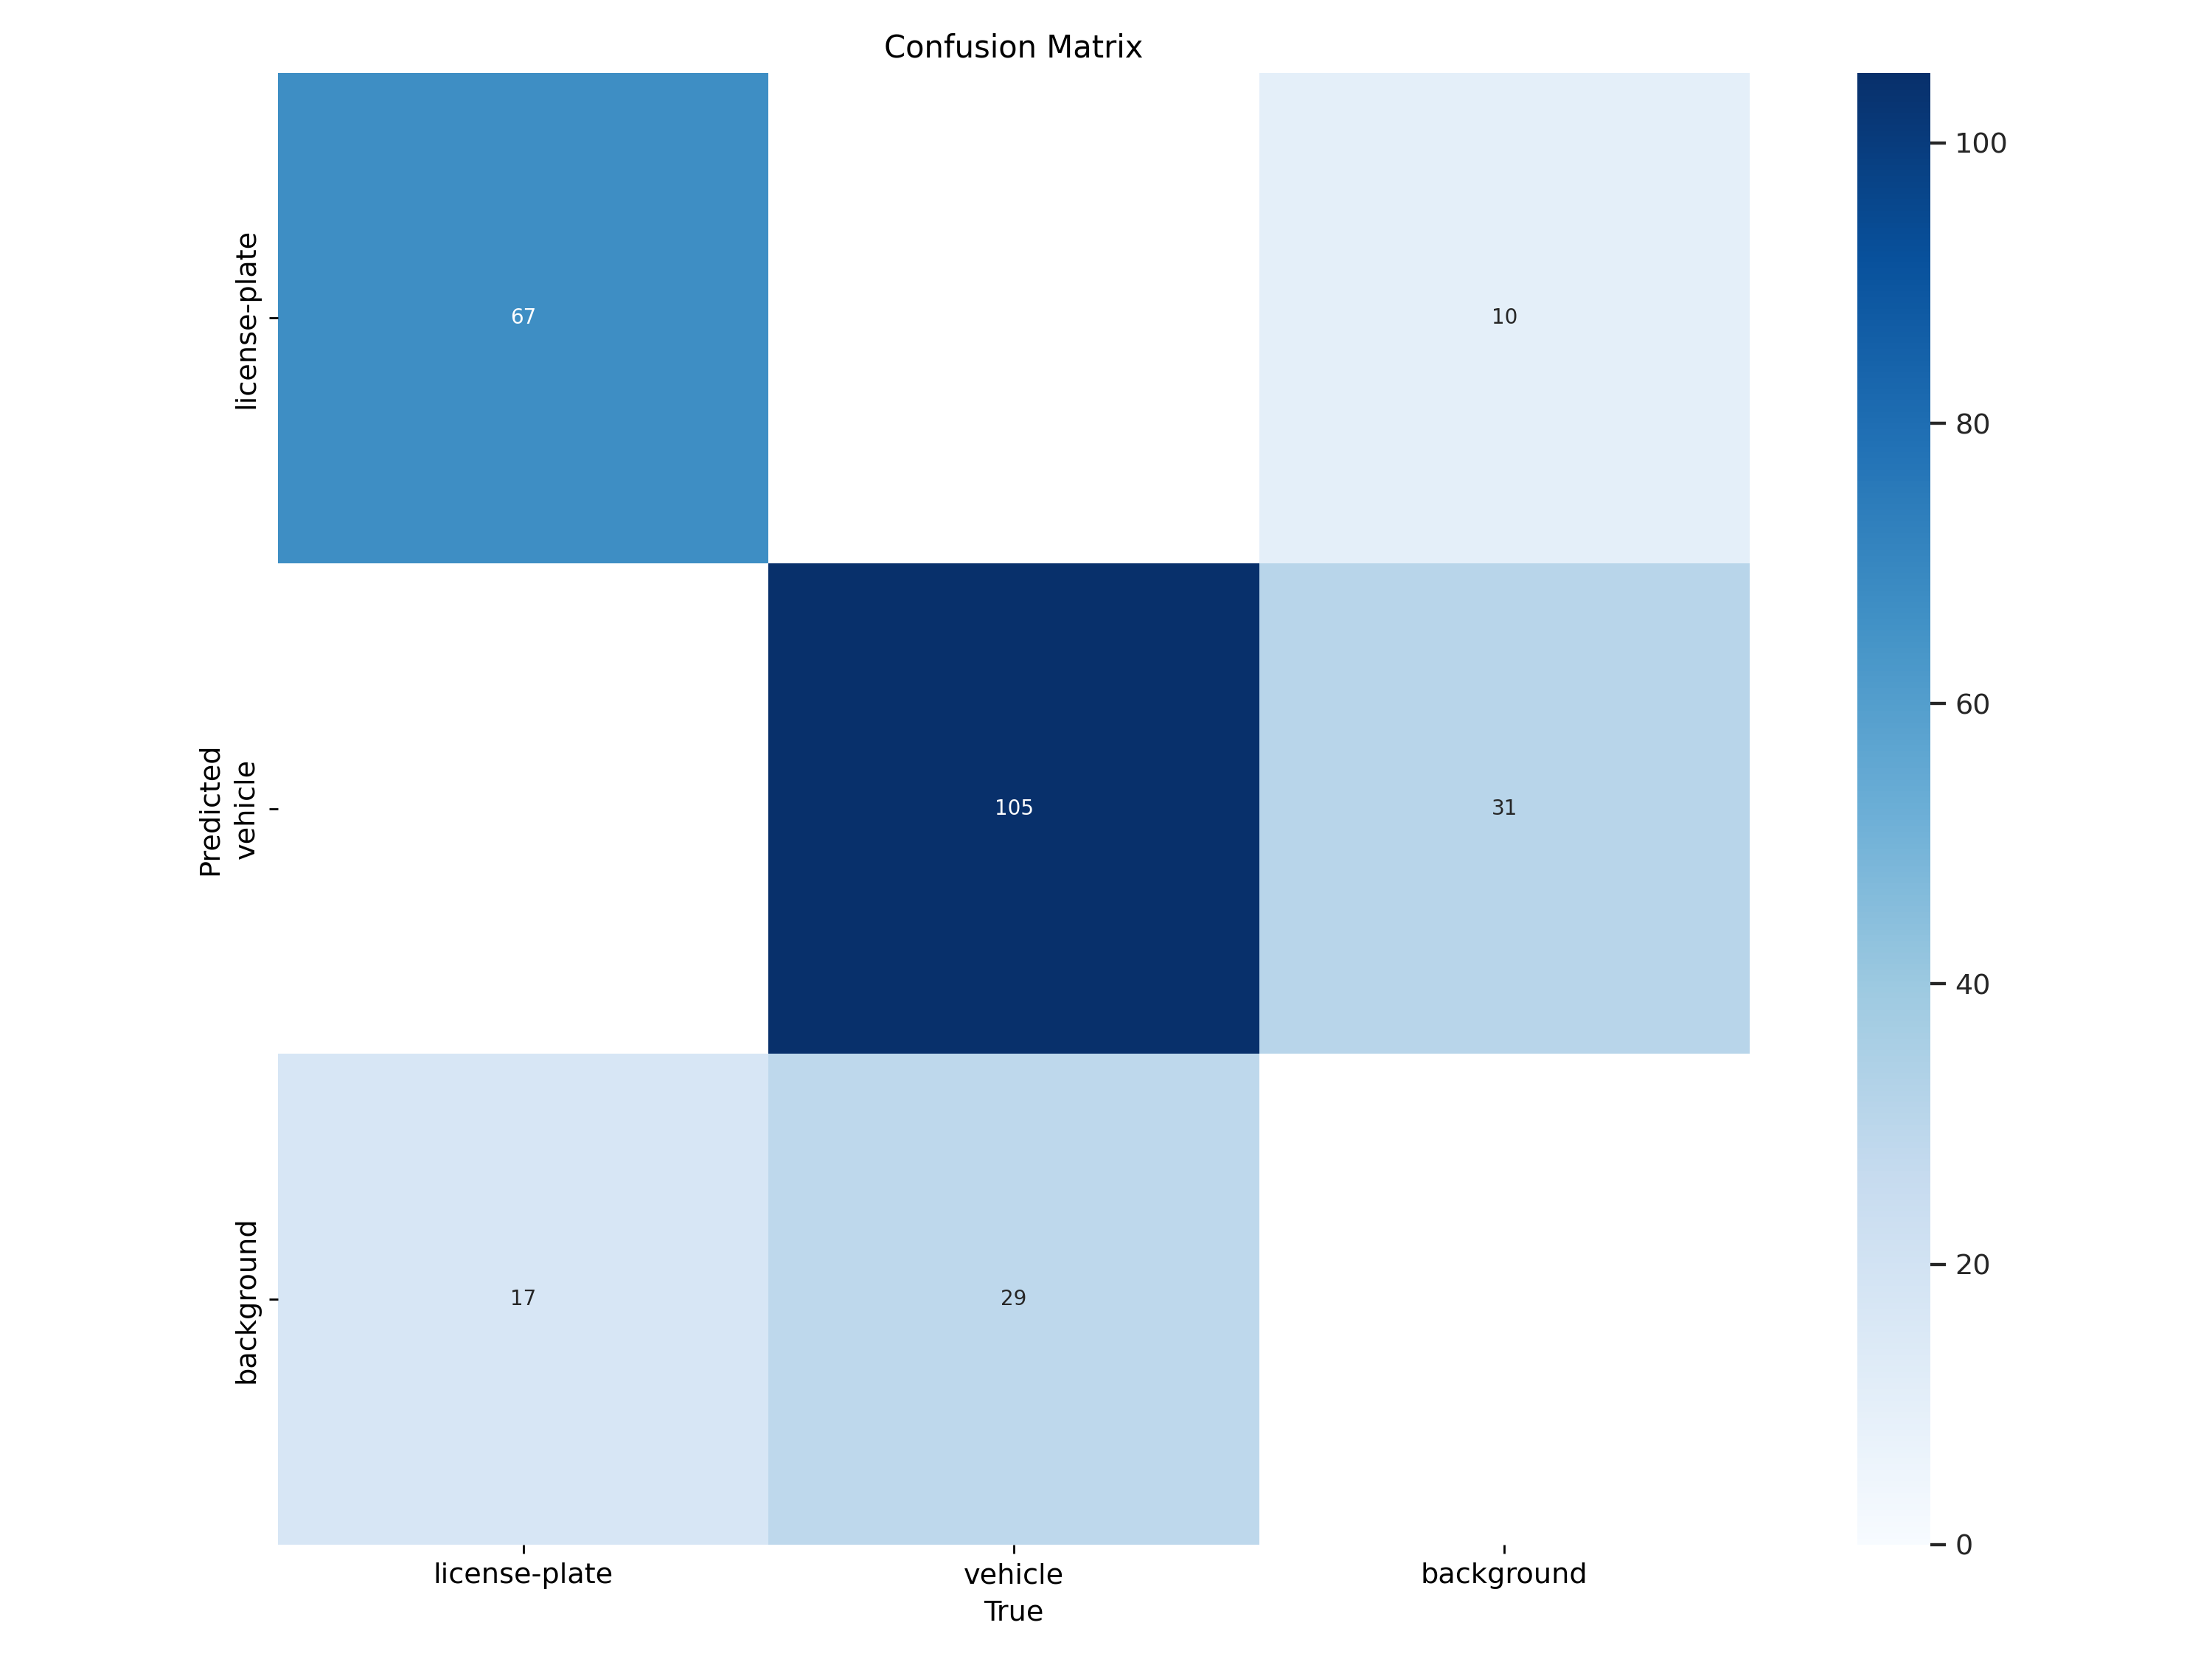

In [11]:
Image("/content/runs/detect/train/confusion_matrix.png")

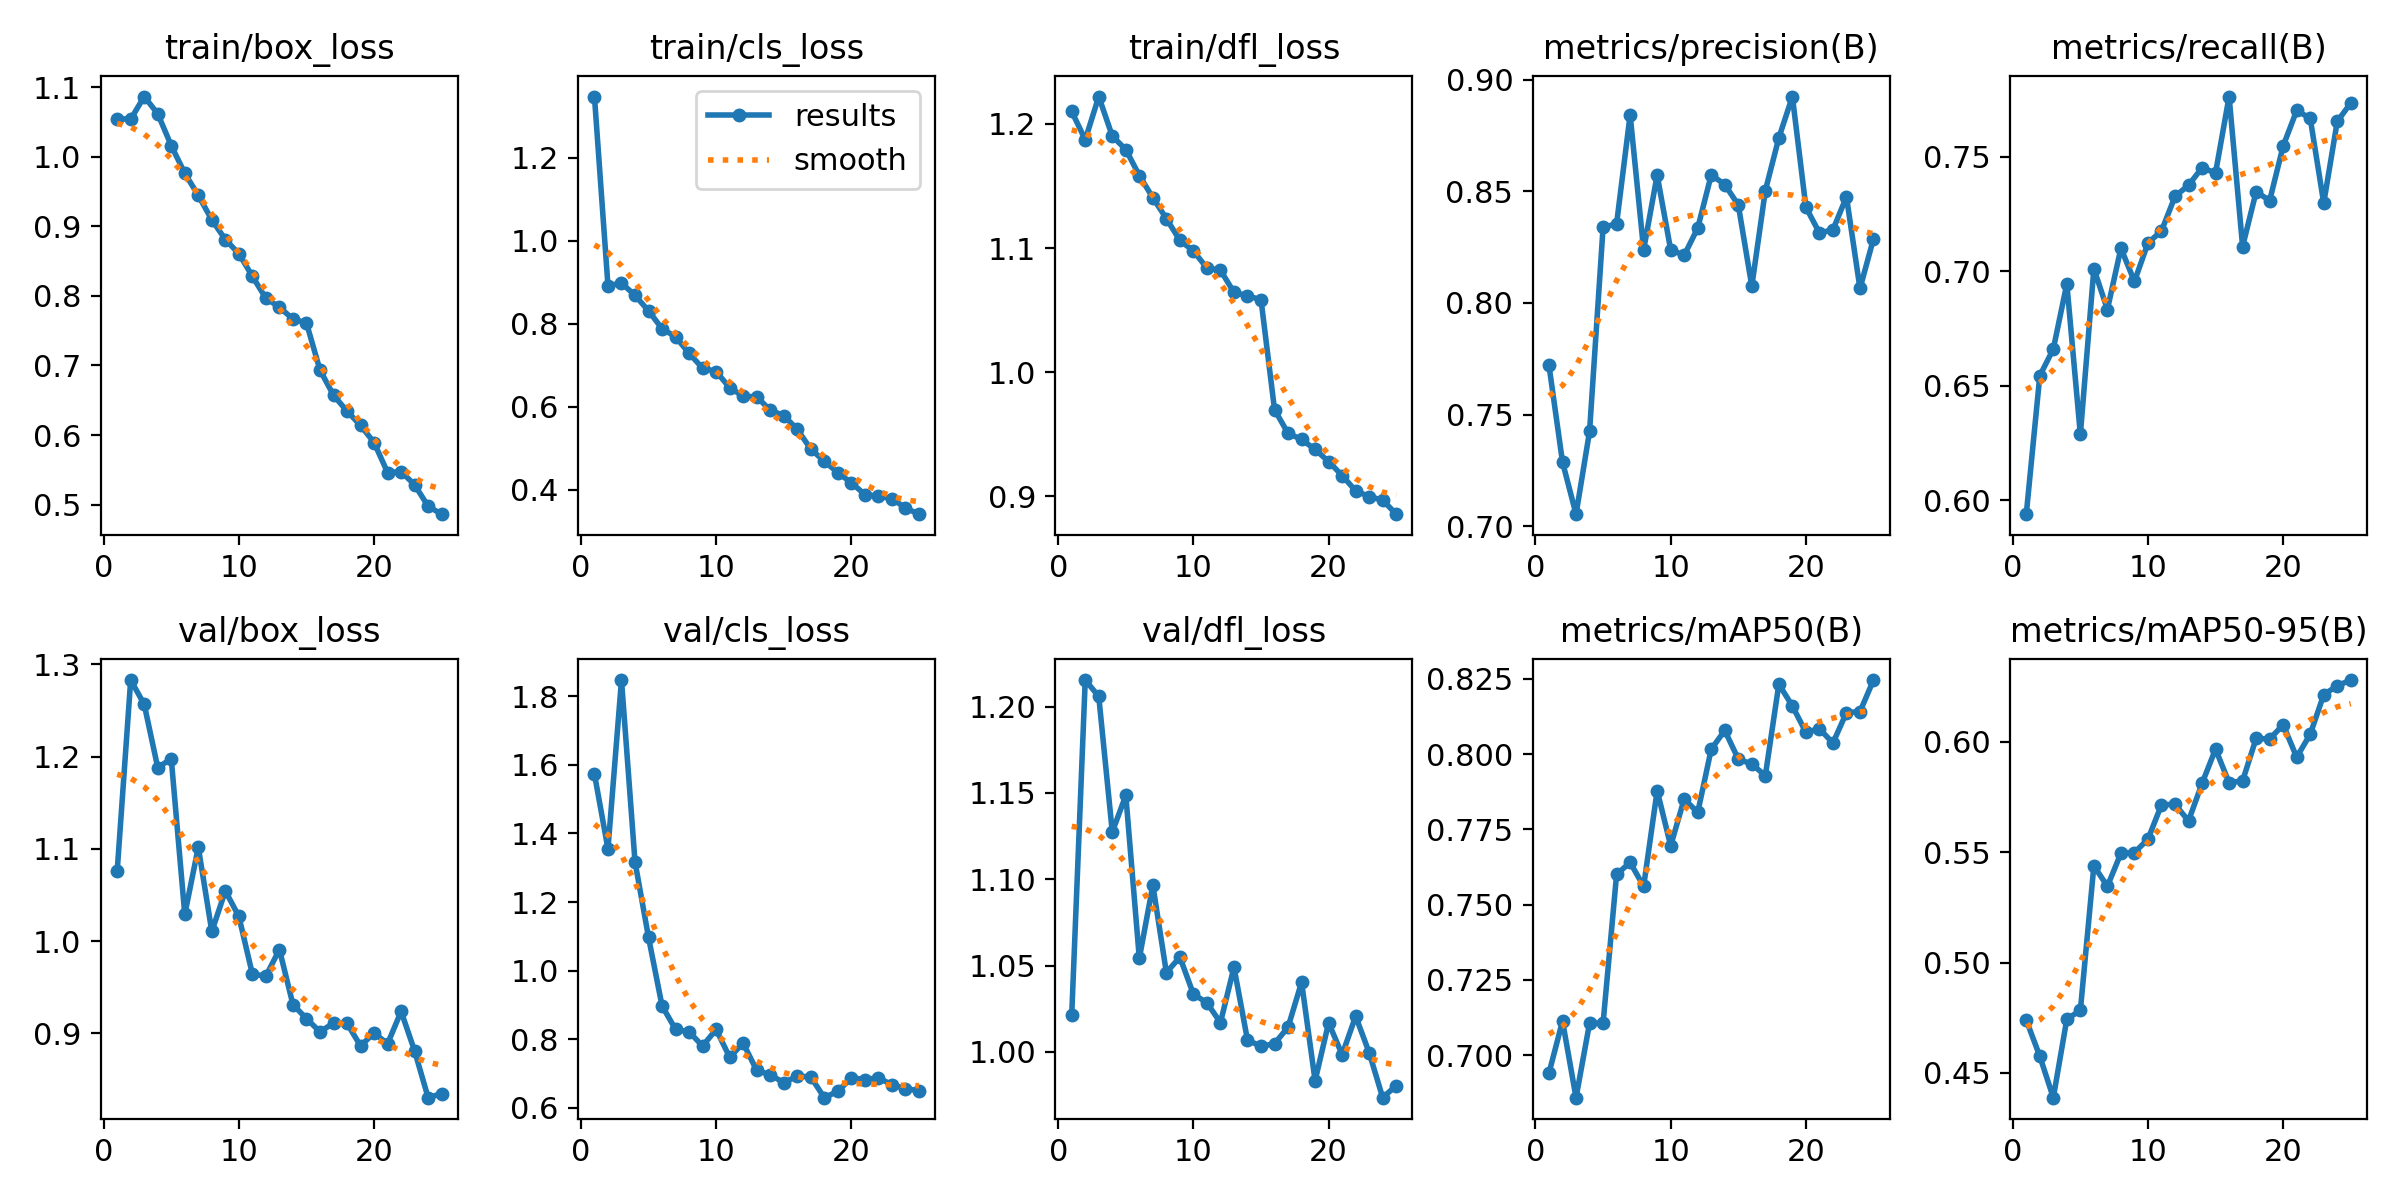

In [12]:
Image("/content/runs/detect/train/results.png")

In [14]:
import cv2
cv2.VideoCapture("/content/runs/detect/predict/a.avi")

< cv2.VideoCapture 0x7f9ce7d292f0>

In [15]:
cv2.VideoCapture("/content/a.mp4")

< cv2.VideoCapture 0x7f9ce7d29cd0>

In [16]:
! yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/istockphoto-1188450871-640_adpp_is.mp4

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/168) /content/istockphoto-1188450871-640_adpp_is.mp4: 128x224 3 license-plates, 4 vehicles, 98.7ms
video 1/1 (frame 2/168) /content/istockphoto-1188450871-640_adpp_is.mp4: 128x224 1 license-plate, 4 vehicles, 7.8ms
video 1/1 (frame 3/168) /content/istockphoto-1188450871-640_adpp_is.mp4: 128x224 1 license-plate, 3 vehicles, 7.7ms
video 1/1 (frame 4/168) /content/istockphoto-1188450871-640_adpp_is.mp4: 128x224 1 license-plate, 3 vehicles, 7.6ms
video 1/1 (frame 5/168) /content/istockphoto-1188450871-640_adpp_is.mp4: 128x224 1 license-plate, 5 vehicles, 7.3ms
video 1/1 (frame 6/168) /content/istockphoto-1188450871-640_adpp_is.mp4: 128x224 2 license-plates, 4 vehicles, 7.3ms
video 1/1 (frame 7/168) /content/istockphoto-1188450871-640_adpp_is.mp4: 128x224 2 license-plates, 4 vehicles, 14.8ms
video 1/1 (fra

In [17]:
! yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/istockphoto-1188450887-640_adpp_is.mp4

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/472) /content/istockphoto-1188450887-640_adpp_is.mp4: 128x224 2 license-plates, 5 vehicles, 193.0ms
video 1/1 (frame 2/472) /content/istockphoto-1188450887-640_adpp_is.mp4: 128x224 2 license-plates, 6 vehicles, 8.7ms
video 1/1 (frame 3/472) /content/istockphoto-1188450887-640_adpp_is.mp4: 128x224 2 license-plates, 7 vehicles, 7.1ms
video 1/1 (frame 4/472) /content/istockphoto-1188450887-640_adpp_is.mp4: 128x224 2 license-plates, 10 vehicles, 7.4ms
video 1/1 (frame 5/472) /content/istockphoto-1188450887-640_adpp_is.mp4: 128x224 2 license-plates, 8 vehicles, 6.9ms
video 1/1 (frame 6/472) /content/istockphoto-1188450887-640_adpp_is.mp4: 128x224 2 license-plates, 7 vehicles, 7.3ms
video 1/1 (frame 7/472) /content/istockphoto-1188450887-640_adpp_is.mp4: 128x224 2 license-plates, 5 vehicles, 9.9ms
video 1/1

In [18]:
! yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/istockphoto-1188451283-640_adpp_is.mp4

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/550) /content/istockphoto-1188451283-640_adpp_is.mp4: 128x224 1 license-plate, 3 vehicles, 98.0ms
video 1/1 (frame 2/550) /content/istockphoto-1188451283-640_adpp_is.mp4: 128x224 2 license-plates, 3 vehicles, 8.0ms
video 1/1 (frame 3/550) /content/istockphoto-1188451283-640_adpp_is.mp4: 128x224 3 vehicles, 7.0ms
video 1/1 (frame 4/550) /content/istockphoto-1188451283-640_adpp_is.mp4: 128x224 3 vehicles, 7.3ms
video 1/1 (frame 5/550) /content/istockphoto-1188451283-640_adpp_is.mp4: 128x224 2 vehicles, 7.0ms
video 1/1 (frame 6/550) /content/istockphoto-1188451283-640_adpp_is.mp4: 128x224 1 license-plate, 2 vehicles, 7.3ms
video 1/1 (frame 7/550) /content/istockphoto-1188451283-640_adpp_is.mp4: 128x224 3 vehicles, 6.9ms
video 1/1 (frame 8/550) /content/istockphoto-1188451283-640_adpp_is.mp4: 128x224 2 ve

In [19]:
! yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/istockphoto-1188452118-640_adpp_is.mp4

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/148) /content/istockphoto-1188452118-640_adpp_is.mp4: 128x224 2 license-plates, 4 vehicles, 99.6ms
video 1/1 (frame 2/148) /content/istockphoto-1188452118-640_adpp_is.mp4: 128x224 1 license-plate, 5 vehicles, 7.6ms
video 1/1 (frame 3/148) /content/istockphoto-1188452118-640_adpp_is.mp4: 128x224 1 license-plate, 5 vehicles, 6.9ms
video 1/1 (frame 4/148) /content/istockphoto-1188452118-640_adpp_is.mp4: 128x224 1 license-plate, 4 vehicles, 7.2ms
video 1/1 (frame 5/148) /content/istockphoto-1188452118-640_adpp_is.mp4: 128x224 1 license-plate, 3 vehicles, 6.8ms
video 1/1 (frame 6/148) /content/istockphoto-1188452118-640_adpp_is.mp4: 128x224 3 license-plates, 4 vehicles, 7.2ms
video 1/1 (frame 7/148) /content/istockphoto-1188452118-640_adpp_is.mp4: 128x224 2 license-plates, 4 vehicles, 6.8ms
video 1/1 (fram